0.2632754534648096 0.29999999999999927


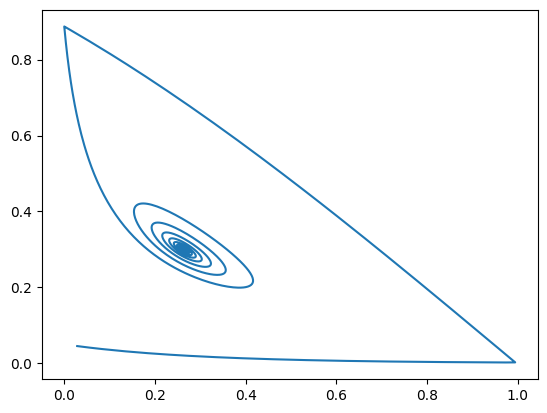

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Xc = 0
Xh = 0.05
Xw = 0.95

dt = 0.1
t_max = 10000

A = 0.3
B = 4

C_result = np.zeros(int(t_max/dt))
H_result = np.zeros(int(t_max/dt))

for i in range(int(t_max/dt)):
    Xc = Xc + (A * Xw - B * Xc * Xh**2) * dt
    Xh = Xh + (B * Xc * Xh**2 - Xh * Xw) * dt
    Xw = Xw + (Xh * Xw - A * Xw) * dt
    C_result[i] = Xc
    H_result[i] = Xh

plt.plot(C_result, H_result)
print(C_result[-1], H_result[-1])

